In [64]:
# Workaround for training output not visible in JupyterNotebook https://github.com/microsoft/vscode-jupyter/issues/13163
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [65]:
from fastai.vision.all import *
import pandas as pd

Downloads the FOOD dataset from FastAI's S3 bucket. 

In [66]:
foodPath = untar_data(URLs.FOOD)

A few sample files 

In [199]:
get_image_files(foodPath)[0:5]

(#5) [Path('/home/mendhak/.fastai/data/food-101/images/lobster_roll_sandwich/486928.jpg'),Path('/home/mendhak/.fastai/data/food-101/images/lobster_roll_sandwich/1729847.jpg'),Path('/home/mendhak/.fastai/data/food-101/images/lobster_roll_sandwich/1449694.jpg'),Path('/home/mendhak/.fastai/data/food-101/images/lobster_roll_sandwich/597515.jpg'),Path('/home/mendhak/.fastai/data/food-101/images/lobster_roll_sandwich/1609601.jpg')]

The top level files visible in the download. We will use some of these later to build the dataset. 

In [197]:
print(os.listdir(foodPath))

['classes.txt', 'labels.txt', 'train.json', 'test.txt', 'export.pkl', 'h5', 'test.json', 'train.txt', 'images']


Sample tiramisu image.

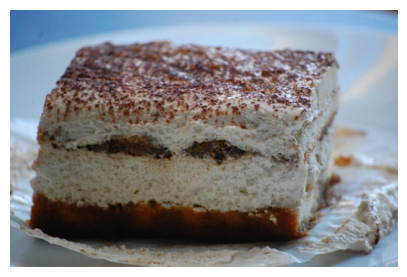

In [200]:
img = PILImage.create('/home/mendhak/.fastai/data/food-101/images/tiramisu/63187.jpg')
img.show();

Load all the files from the training text file into a dataframe. 

In [132]:
df_train = pd.read_csv('/home/mendhak/.fastai/data/food-101/train.txt', header=None, names=['path'])
df_train.head()

,path
0,apple_pie/1005649
1,apple_pie/1014775
2,apple_pie/1026328
3,apple_pie/1028787
4,apple_pie/1043283


Add a column, derive the label for the file from the path. 

In [133]:
df_train['label'] = df_train['path'].map(lambda x: x.split('/')[0])
df_train.head()

,path,label
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


Another column, the index

In [134]:
df_train['idx'] = df_train['path'].map(lambda x: x.split('/')[1])
df_train.head()

,path,label,idx
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283


Add a filename column which is just the filename without the full path. 
Expand the path to include the full location and extension.

In [135]:
df_train['filename'] = df_train['path'].map(lambda x: x.split('/')[1] + '.jpg')
df_train['path'] = df_train['path'].apply(lambda x: '/home/mendhak/.fastai/data/food-101/images/' + x + '.jpg')
df_train.head(5)

,path,label,idx,filename
0,/home/mendhak/.fastai/data/food-101/images/apple_pie/1005649.jpg,apple_pie,1005649,1005649.jpg
1,/home/mendhak/.fastai/data/food-101/images/apple_pie/1014775.jpg,apple_pie,1014775,1014775.jpg
2,/home/mendhak/.fastai/data/food-101/images/apple_pie/1026328.jpg,apple_pie,1026328,1026328.jpg
3,/home/mendhak/.fastai/data/food-101/images/apple_pie/1028787.jpg,apple_pie,1028787,1028787.jpg
4,/home/mendhak/.fastai/data/food-101/images/apple_pie/1043283.jpg,apple_pie,1043283,1043283.jpg


,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


Show the available labels. 

In [93]:
labels = df_train['label'].unique()
labels

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla',
       'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros',
       'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee',
       'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts',
       'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel',
       'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries',
       'french_onion_soup', 'french_toast', 'fried_calamari',
       'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi',
       'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon',
       'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog',
       'huevos_rancheros', 'hummus', 'ice_cr

How many files in the training dataframe?

In [94]:
len(df_train['path'])

75750

Helper functions which will be used by the dataloader.

In [157]:
def get_label_by_filename(filename):
    label = df_train.loc[df_train['filename'] == filename]
    if not label.empty:
        return label['label'].values[0]
    else:
        return 'Other'

# Test it
get_label_by_filename('1028787.jpg')



'apple_pie'

Helper function which returns all the file paths as Path() objects in a list. 

In [125]:
import pathlib
def get_images_to_train_on():
    return df_train['path'].map(lambda x: pathlib.Path(x)).to_list()
get_images_to_train_on()[:5]

[Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1005649.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1014775.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1026328.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1028787.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1043283.jpg')]

The actual dataloader. 0.2 (20%) of images from the training get set aside for validation. 
`get_images_to_train_on` returns a list of Path() objects. 
The data loader calls `get_label_by_filename` with just the filename and expects a label back.  get_image_files

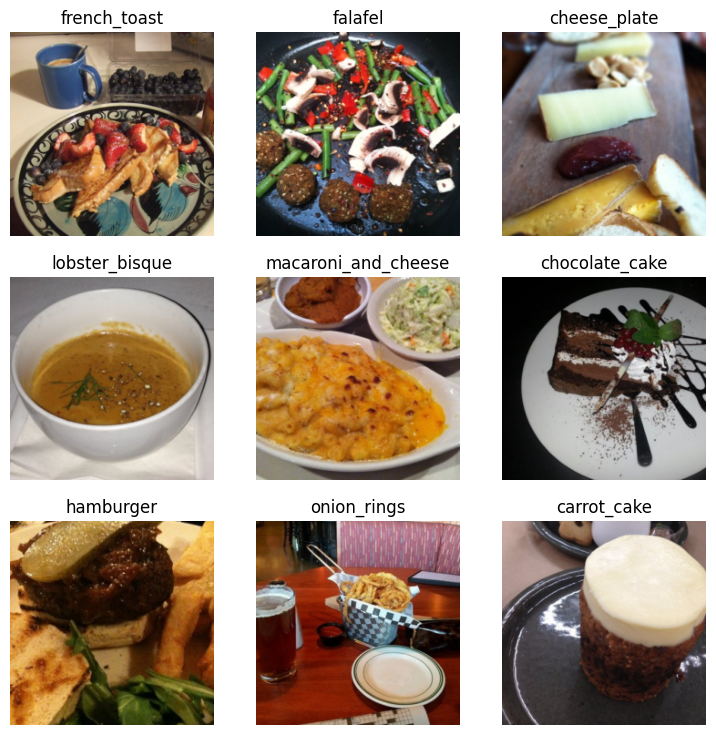

In [160]:
dls = ImageDataLoaders.from_name_func(
    foodPath, 
    get_images_to_train_on(), 
    valid_pct=0.2, 
    seed=42,
    label_func=get_label_by_filename, 
    item_tfms=Resize(224))

dls.train.show_batch()

Runs the training 10 times using resnet34 (took me 30 minutes)

In [161]:
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.632037,1.320823,0.657690,03:19
1,1.367752,1.252494,0.672607,03:03
2,1.174492,1.210742,0.687261,03:02
3,0.849387,1.178803,0.707591,02:50
4,0.579616,1.196034,0.713003,02:43
5,0.342652,1.249248,0.717690,02:45
6,0.164847,1.268490,0.727723,02:45
7,0.091290,1.283023,0.737030,02:45
8,0.048500,1.266135,0.742244,02:45
9,0.031079,1.268884,0.741320,02:45


Prompt user for a URL, download it, then predict what it is. 

This is a churros. Probability: 1.00


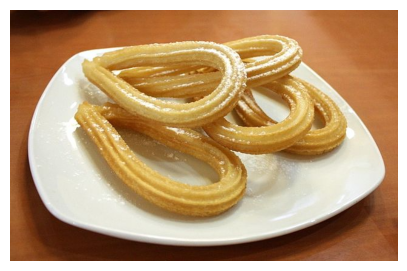

In [192]:
url_to_image = input()
print(url_to_image)
from fastdownload import download_url
dest = 'user_input.jpg'
download_url(url_to_image, dest, show_progress=False)

img = PILImage.create(dest)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}. Probability: {probs[_].item():.2f}")


Now run some predictions against the test.txt dataset which was not used as part of the training. 
Prepare the dataframe with paths. 

In [216]:
#df_test=pd.read_json('/home/mendhak/.fastai/data/food-101/test.json')
df_test = pd.read_csv('/home/mendhak/.fastai/data/food-101/test.txt', header=None, names=['path'])
df_test['path'] = df_test['path'].apply(lambda x: '/home/mendhak/.fastai/data/food-101/images/' + x + '.jpg')
df_test.head()

,path
0,/home/mendhak/.fastai/data/food-101/images/apple_pie/1011328.jpg
1,/home/mendhak/.fastai/data/food-101/images/apple_pie/101251.jpg
2,/home/mendhak/.fastai/data/food-101/images/apple_pie/1034399.jpg
3,/home/mendhak/.fastai/data/food-101/images/apple_pie/103801.jpg
4,/home/mendhak/.fastai/data/food-101/images/apple_pie/1038694.jpg


Prepare helper method to return the paths as a list of Path() objects

In [207]:
def get_images_to_test_on():
    return df_test['path'].map(lambda x: pathlib.Path(x)).to_list()

get_images_to_test_on()[:5]

[Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1011328.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/101251.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1034399.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/103801.jpg'),
 Path('/home/mendhak/.fastai/data/food-101/images/apple_pie/1038694.jpg')]

Choose random items from the test set and predict. 

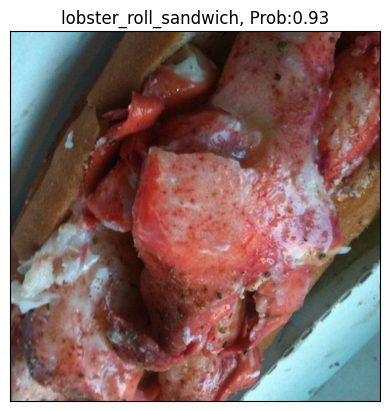

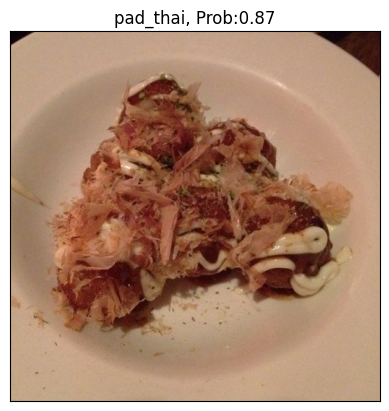

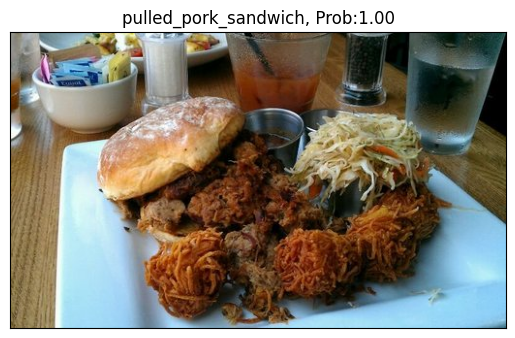

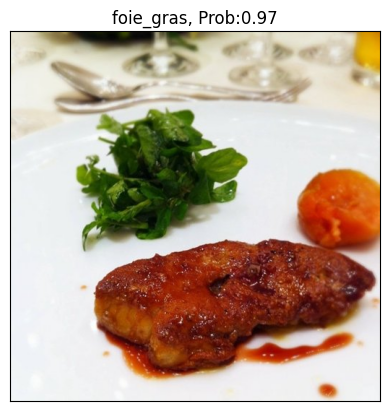

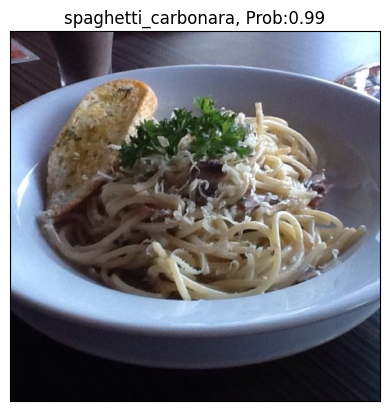

In [219]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_images = get_images_to_test_on()

for i in range(0,5):
  randomIndex = random.randint(0, len(test_images)-1)
  img = mpimg.imread(test_images[randomIndex])
  label,_,probs = learn.predict(img)

  fig = plt.figure()
  ax = fig.add_subplot() 
  imgplot = plt.imshow(img) 
  ax.set_title(f"{label}, Prob:{probs[_].item():.2f}")
  

  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

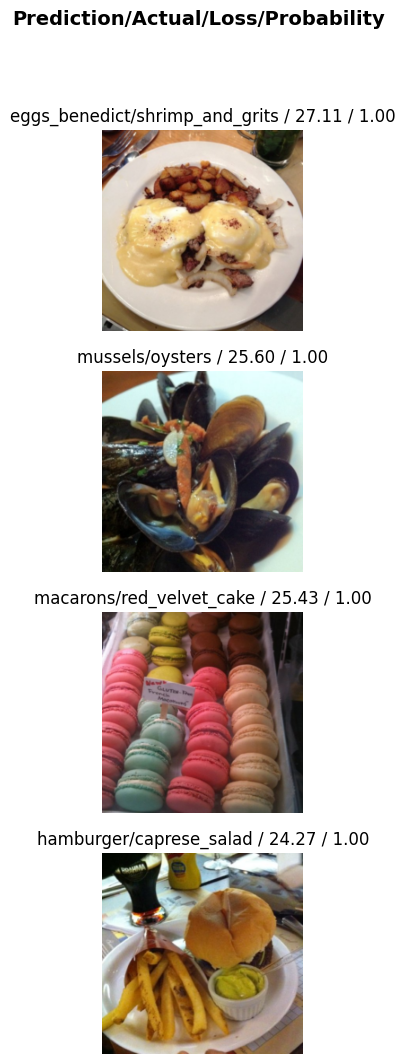

In [194]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4,nrows=4)

In [195]:
learn.export() 
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('/home/mendhak/.fastai/data/food-101/export.pkl')

In [196]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[1260])) 

('dumplings',
 tensor(32),
 tensor([5.0732e-06, 1.4928e-08, 1.6872e-06, 2.1213e-08, 1.3016e-08, 4.1638e-08,
         1.4470e-07, 1.1103e-07, 7.6230e-06, 1.3111e-06, 1.7466e-07, 2.8604e-08,
         6.2195e-06, 2.8421e-08, 4.9306e-07, 4.7147e-08, 4.5805e-08, 2.2084e-06,
         3.3325e-07, 1.7174e-07, 2.0442e-07, 6.4095e-08, 2.6420e-08, 6.7078e-07,
         1.1221e-08, 1.7784e-10, 9.4900e-07, 2.5017e-04, 3.1273e-07, 6.3616e-07,
         5.5570e-06, 7.7636e-06, 9.9339e-01, 7.3622e-08, 8.6144e-07, 4.7961e-07,
         3.7120e-08, 1.1089e-07, 1.4583e-07, 9.1337e-06, 2.1368e-09, 1.0867e-07,
         2.2877e-06, 1.3303e-06, 1.1051e-08, 3.7214e-07, 5.4158e-08, 4.2381e-07,
         3.6372e-10, 1.3036e-07, 1.0999e-06, 2.1851e-08, 5.4895e-03, 4.0844e-08,
         4.0410e-08, 2.0420e-07, 1.4305e-05, 8.7888e-08, 1.3521e-07, 3.3347e-07,
         1.5697e-08, 4.1311e-09, 8.2968e-07, 1.5216e-09, 4.7682e-08, 5.0021e-08,
         5.1699e-07, 1.6020e-07, 1.9921e-08, 5.5247e-06, 7.4000e-08, 1.4842e-08,
 